In [5]:
import lcstack
lcstack.set_config_root("configs")
lcs = lcstack.LcStack.from_yaml("workflow_simple_as_agent.yaml", env=True, secret=True, settings=True)

wf = lcs.get("workflow_simple")

print(wf)
config = {"thread_id": "test_workflow_1"}
wf.invoke({"question": "tell me a joke about apple!"}, config=config)

first=RunnableLambda(_enter_graph) middle=[] last=<langgraph.graph.state.CompiledStateGraph object at 0x0000023B7CCB49E0>


{'question': 'tell me a joke about apple!',
 'not_used': 'this is a not used field',
 'response': "Sure, here's a light-hearted apple joke for you:\n\nWhy don't apples hurt the gardener?\n\nBecause they have a core of wisdom!",
 'branch__steps__': []}

#### Build a ReAct Agent with Workflow

In [1]:
import lcstack

lcstack.set_config_root("configs")
lcs = lcstack.LcStack.from_yaml("workflow_react.yaml", env=True, secret=True, settings=True)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [ ]:
llm_with_tools = lcs.get("llm_with_tools")
print(llm_with_tools)

llm_with_tools.invoke("Trump's recent news")

In [2]:
workflow_react = lcs.get("workflow_react")
print(workflow_react)

# from langchain_core.tracers.stdout import ConsoleCallbackHandler
from lcstack.components.tracers.console import ConsoleCallbackHandler
config = {"thread_id": "workflow_react_1", "callbacks": [ConsoleCallbackHandler()]} # callbacks=["llm"]
workflow_react.invoke(input={"query": "Trump's recent news"}, config=config)

first=RunnableLambda(_enter_graph) middle=[] last=<langgraph.graph.state.CompiledStateGraph object at 0x00000172B666F890>
[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "query": "Trump's recent news"
}
[chain/start] [chain:RunnableSequence > chain:_enter_graph] Entering Chain run with input:
{
  "query": "Trump's recent news"
}
[chain/end] [chain:RunnableSequence > chain:_enter_graph] s] Exiting Chain run with output:
[outputs]
[chain/start] [chain:RunnableSequence > chain:LangGraph] Entering Chain run with input:
[inputs]
[chain/start] [chain:RunnableSequence > chain:LangGraph > chain:__start__] Entering Chain run with input:
[inputs]
[chain/end] [chain:RunnableSequence > chain:LangGraph > chain:__start__] s] Exiting Chain run with output:
[outputs]
[chain/start] [chain:RunnableSequence > chain:LangGraph > chain:ReactWorkflow_llm_node] Entering Chain run with input:
[inputs]
[chain/start] [chain:RunnableSequence > chain:LangGraph > chain:ReactWorkflow_llm_no

2024-09-26 17:33:38,060 - root - WARNING - output is a string or BaseMessage, expected a dict. Forcing it to be a dict.


[llm/end] [chain:RunnableSequence > chain:LangGraph > chain:ReactWorkflow_llm_node > llm:ChatOllama] [24.54s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "",
        "generation_info": {
          "model": "qwen2.5",
          "created_at": "2024-09-26T09:33:38.0576804Z",
          "message": {
            "role": "assistant",
            "content": "",
            "tool_calls": [
              {
                "function": {
                  "name": "tavily_search_results_json",
                  "arguments": {
                    "query": "Trump's recent news"
                  }
                }
              }
            ]
          },
          "done_reason": "stop",
          "done": true,
          "total_duration": 24534415800,
          "load_duration": 5833480700,
          "prompt_eval_count": 191,
          "prompt_eval_duration": 14850666000,
          "eval_count": 27,
          "eval_duration": 3843473000
        },
        "type": 

2024-09-26 17:35:12,945 - root - WARNING - output is a string or BaseMessage, expected a dict. Forcing it to be a dict.


[llm/end] [chain:RunnableSequence > chain:LangGraph > chain:ReactWorkflow_llm_node > llm:ChatOllama] [91.55s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "Here are some recent news updates about Donald Trump:\n\n1. **Hush Money Case**: A jury found Trump guilty on all charges in the hush money case after testimony from Stormy Daniels, Michael Cohen, David Pecker, and others. [Read more](https://www.nbcnews.com/politics/donald-trump/live-blog/trump-trial-jury-deliberations-hush-money-case-rcna154607)\n\n2. **Assassination Attempt**: Follow the latest news on the Trump assassination attempt at his Pennsylvania campaign rally. [Read more](https://www.nytimes.com/live/2024/07/13/us/biden-trump-election)\n\n3. **2024 Campaign**: Trump claims women won't be 'thinking about abortion' if he's elected, positioning himself as their protector. [Read more](https://www.cnn.com/politics/president-donald-trump-45)\n\n4. **Grand Jury Indictment**: Trump faces three 

{'messages': [HumanMessage(content="Trump's recent news", additional_kwargs={}, response_metadata={}, name='input'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen2.5', 'created_at': '2024-09-26T09:33:38.0576804Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'tavily_search_results_json', 'arguments': {'query': "Trump's recent news"}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 24534415800, 'load_duration': 5833480700, 'prompt_eval_count': 191, 'prompt_eval_duration': 14850666000, 'eval_count': 27, 'eval_duration': 3843473000}, id='run-bd4719d4-9e0b-48b5-9d35-dcce71f52e33-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "Trump's recent news"}, 'id': 'e3e575a9-b7b4-443a-9389-c7e35302e6c8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 191, 'output_tokens': 27, 'total_tokens': 218}),
  ToolMessage(content='[{"url": "https://www.nbcnews.com/politics/donald-trump/live-bl

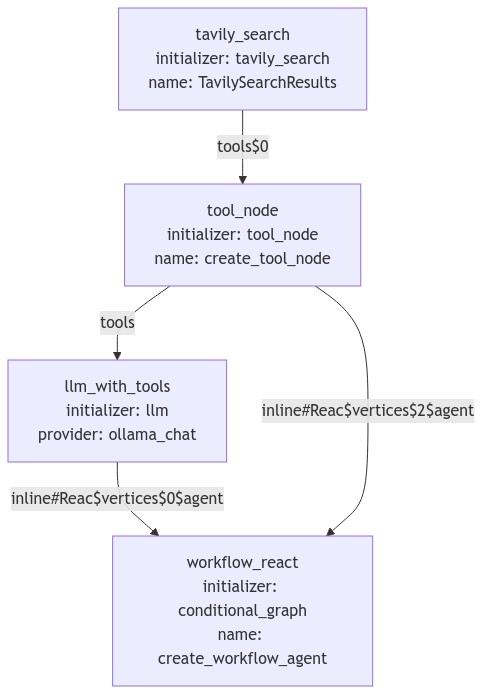

In [4]:
from IPython.display import display, Image

image = lcs.draw_graph_png()

display(Image(image))